In [174]:
import pandas as pd
import numpy as np

In [175]:
df = pd.read_csv("/content/CarPrice.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## data processing

In [176]:
df[["Company", "Model"]] = df['CarName'].str.split(" ", n = 1, expand = True)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246


In [177]:
#for these rows, "Model" column is None, so we need to drop it
df = df.drop(df[~df["CarName"].str.contains(" ")].index, axis = 0)
df = df.drop(["CarName", "car_ID"], axis = 1)
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246


In [178]:
#replace typo
df["Company"] = df["Company"].str.replace("maxda", "mazda")
df["Company"] = df["Company"].str.replace("nissan", "Nissan")
df["Company"] = df["Company"].str.replace("porcshce", "porshe")
df["Company"] = df["Company"].str.replace("toyouta", "toyota")

In [179]:
def replace_contain_chars(text, target = "civic"):
    if (target in text):
        return target
    else:
        return text
df["Model"] = df["Model"].apply(replace_contain_chars)

In [180]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246


## standardize numeric features

In [181]:
#record mean and sd for numeric features for further re-scale
mean_numeric = {}
sd_numeric = {}
for column in df.columns:
    if (df[column].dtype == "int64" or df[column].dtype == "float64"):
        mean_numeric[column] = df[column].mean()
        sd_numeric[column] = df[column].std()

In [182]:
from sklearn.preprocessing import StandardScaler
df["symboling"] = df["symboling"].astype(object)
numeric_columns = []
for column in df.columns:
    if (df[column].dtype in ["int64", "float64"]):
        numeric_columns.append(column)
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,3,gas,std,two,convertible,rwd,front,-1.691128,-0.434186,-0.850551,...,0.530087,-1.911707,-0.289225,0.166973,-0.267799,-0.636887,-0.537054,0.018531,alfa-romero,giulia
1,3,gas,std,two,convertible,rwd,front,-1.691128,-0.434186,-0.850551,...,0.530087,-1.911707,-0.289225,0.166973,-0.267799,-0.636887,-0.537054,0.395285,alfa-romero,stelvio
2,1,gas,std,two,hatchback,rwd,front,-0.711886,-0.239187,-0.197236,...,-2.396250,0.679406,-0.289225,1.254664,-0.267799,-0.943257,-0.682417,0.395285,alfa-romero,Quadrifoglio
3,2,gas,std,four,sedan,fwd,front,0.167772,0.199562,0.129422,...,-0.507095,0.449813,-0.038016,-0.060683,0.779661,-0.177332,-0.100966,0.075576,audi,100 ls
4,2,gas,std,four,sedan,4wd,front,0.101383,0.199562,0.222752,...,-0.507095,0.449813,-0.540435,0.268153,0.779661,-1.096442,-1.263867,0.514392,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,1.711323,1.190810,1.389386,...,1.678397,-0.370159,-0.163620,0.242858,0.570169,-0.330517,-0.391691,0.438539,volvo,145e (sw)
201,-1,gas,turbo,four,sedan,rwd,front,1.711323,1.190810,1.342721,...,1.678397,-0.370159,-0.364588,1.406435,0.360677,-0.943257,-0.827779,0.714366,volvo,144ea
202,-1,gas,std,four,sedan,rwd,front,1.711323,1.190810,1.389386,...,0.937552,-1.288528,-0.339467,0.748761,0.779661,-1.096442,-1.118504,1.020283,volvo,244dl
203,-1,diesel,turbo,four,sedan,rwd,front,1.711323,1.190810,1.389386,...,-1.173856,0.449813,3.227710,0.040497,-0.686783,0.129038,-0.537054,1.143778,volvo,246


In [183]:
df["doornumber"] = df["doornumber"].apply(lambda x: 2 if x == "two" else 4)

In [184]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for column in df.columns:
    if (df[column].dtype == "object" and column != "symboling"):
        df[column] = encoder.fit_transform(df[column])

In [185]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,3,1,0,2,0,2,0,-1.691128,-0.434186,-0.850551,...,0.530087,-1.911707,-0.289225,0.166973,-0.267799,-0.636887,-0.537054,0.018531,1,74
1,3,1,0,2,0,2,0,-1.691128,-0.434186,-0.850551,...,0.530087,-1.911707,-0.289225,0.166973,-0.267799,-0.636887,-0.537054,0.395285,1,118
2,1,1,0,2,2,2,0,-0.711886,-0.239187,-0.197236,...,-2.396250,0.679406,-0.289225,1.254664,-0.267799,-0.943257,-0.682417,0.395285,1,28
3,2,1,0,4,3,1,0,0.167772,0.199562,0.129422,...,-0.507095,0.449813,-0.038016,-0.060683,0.779661,-0.177332,-0.100966,0.075576,2,0
4,2,1,0,4,3,0,0,0.101383,0.199562,0.222752,...,-0.507095,0.449813,-0.540435,0.268153,0.779661,-1.096442,-1.263867,0.514392,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,4,3,2,0,1.711323,1.190810,1.389386,...,1.678397,-0.370159,-0.163620,0.242858,0.570169,-0.330517,-0.391691,0.438539,23,5
201,-1,1,1,4,3,2,0,1.711323,1.190810,1.342721,...,1.678397,-0.370159,-0.364588,1.406435,0.360677,-0.943257,-0.827779,0.714366,23,4
202,-1,1,0,4,3,2,0,1.711323,1.190810,1.389386,...,0.937552,-1.288528,-0.339467,0.748761,0.779661,-1.096442,-1.118504,1.020283,23,6
203,-1,0,1,4,3,2,0,1.711323,1.190810,1.389386,...,-1.173856,0.449813,3.227710,0.040497,-0.686783,0.129038,-0.537054,1.143778,23,8


## Set X and y for further use

In [186]:
df["symboling"] = df["symboling"].astype("int64")
predictor = ["wheelbase", "carlength", "carwidth", "carheight",
             "curbweight", "enginesize", "boreratio", "stroke",
             "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg"]
X = df[predictor]
y = df["price"]

## check linearity

In [187]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

Text(0, 0.5, 'Residuals')

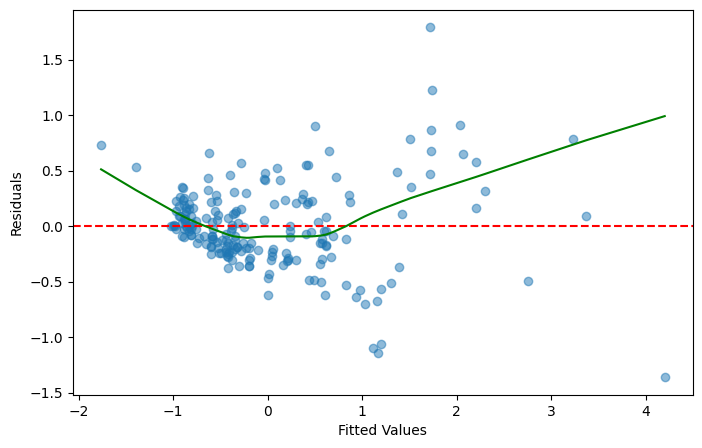

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

fitted_values = model.fittedvalues
residuals = model.resid

# Plotting Residuals vs Fitted with a Lowess line
plt.figure(figsize=(8, 5))
plt.scatter(fitted_values, residuals, alpha=0.5, label='Residuals')
plt.axhline(0, color='red', linestyle='--')

# Adding a lowess smooth line
lowess = sm.nonparametric.lowess(residuals, fitted_values)
plt.plot(lowess[:, 0], lowess[:, 1], color='green', label='Lowess line')

plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

This suggests a non-linear pattern between resiguals and fitted values.

## Remove unusual observations

In [189]:
influence = model.get_influence()
summary_frame = influence.summary_frame()
#print(summary_frame)
print(summary_frame[['cooks_d', 'standard_resid', 'hat_diag']])

      cooks_d  standard_resid  hat_diag
0    0.000136        0.136356  0.092825
1    0.009235        1.124095  0.092825
2    0.001932       -0.414062  0.136248
3    0.001101        0.758762  0.026082
4    0.000748        0.532957  0.035560
..        ...             ...       ...
200  0.000992       -0.460057  0.061559
201  0.000497       -0.296144  0.073572
202  0.004425       -0.944715  0.064905
203  0.005729        0.757599  0.122602
204  0.005959        1.132390  0.061081

[203 rows x 3 columns]


In [190]:
# Criteria to identify potential outliers
# Studentized residuals greater than 2 or less than -2
# High leverage points (greater than 2*(k+1)/n where k is the number of predictors and n is the number of observations)
# High Cook's distance (commonly used threshold is 4/(n-k-1))
k = len(predictor)
outliers = summary_frame.loc[(summary_frame['standard_resid'].abs() > 2) |
                             (summary_frame['hat_diag'] > 2*(k+1)/100) |
                             (summary_frame['cooks_d'] > 4/(df.shape[0]-k-1))]

print("Potential Outliers:")
print(outliers)

Potential Outliers:
     dfb_const  dfb_wheelbase  dfb_carlength  dfb_carwidth  dfb_carheight  \
8     0.137163      -0.216980       0.130595      0.469460       0.119632   
14    0.169053      -0.067447       0.178685     -0.111448       0.013061   
16    0.349380      -0.123185       0.504767     -0.409423      -0.078804   
17    0.170463       0.047826      -0.023377      0.197235       0.161898   
18    0.149009       0.123307      -0.159463     -0.199267       0.052457   
30    0.117332      -0.217973      -0.024583      0.245226       0.011948   
48    0.119931       0.149882      -0.037074     -0.225949      -0.186934   
49   -0.331473       0.019209      -0.276607      0.110834       0.648945   
57    0.128418       0.059952      -0.051860      0.025639      -0.220470   
70    0.150186       0.097937      -0.014843      0.102653      -0.135722   
72    0.147388      -0.557929      -0.147103      0.456408       0.030683   
74    0.173039      -0.005320      -0.072902      0.3085

In [191]:
#remove outliers
outlier_criteria = ((summary_frame['standard_resid'].abs() > 2) |
                             (summary_frame['hat_diag'] > 2*(k+1)/100) |
                             (summary_frame['cooks_d'] > 4/(df.shape[0]-k-1)))
outlier_indices = summary_frame.loc[outlier_criteria].index
outlier_indices

Index([  8,  14,  16,  17,  18,  30,  48,  49,  57,  70,  72,  74, 101, 102,
       103, 126, 127, 128, 129, 134, 155],
      dtype='int64')

In [192]:
df.reset_index(drop=True, inplace=True)
df = df.drop(index=outlier_indices, axis = 0)
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,3,1,0,2,0,2,0,-1.691128,-0.434186,-0.850551,...,0.530087,-1.911707,-0.289225,0.166973,-0.267799,-0.636887,-0.537054,0.018531,1,74
1,3,1,0,2,0,2,0,-1.691128,-0.434186,-0.850551,...,0.530087,-1.911707,-0.289225,0.166973,-0.267799,-0.636887,-0.537054,0.395285,1,118
2,1,1,0,2,2,2,0,-0.711886,-0.239187,-0.197236,...,-2.396250,0.679406,-0.289225,1.254664,-0.267799,-0.943257,-0.682417,0.395285,1,28
3,2,1,0,4,3,1,0,0.167772,0.199562,0.129422,...,-0.507095,0.449813,-0.038016,-0.060683,0.779661,-0.177332,-0.100966,0.075576,2,0
4,2,1,0,4,3,0,0,0.101383,0.199562,0.222752,...,-0.507095,0.449813,-0.540435,0.268153,0.779661,-1.096442,-1.263867,0.514392,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,-1,1,0,4,3,2,0,1.711323,1.190810,1.389386,...,1.678397,-0.370159,-0.163620,0.242858,0.570169,-0.330517,-0.391691,0.438539,23,5
199,-1,1,1,4,3,2,0,1.711323,1.190810,1.342721,...,1.678397,-0.370159,-0.364588,1.406435,0.360677,-0.943257,-0.827779,0.714366,23,4
200,-1,1,0,4,3,2,0,1.711323,1.190810,1.389386,...,0.937552,-1.288528,-0.339467,0.748761,0.779661,-1.096442,-1.118504,1.020283,23,6
201,-1,0,1,4,3,2,0,1.711323,1.190810,1.389386,...,-1.173856,0.449813,3.227710,0.040497,-0.686783,0.129038,-0.537054,1.143778,23,8


## setup neural network

In [193]:
import torch
from torch import nn
import torch.optim as optim

In [194]:
class CarPrice_NN(nn.Module):
  def __init__(self):
    super(CarPrice_NN, self).__init__()
    self.layers = nn.Sequential(
        nn.Linear(in_features=14, out_features=64),
        nn.ReLU(),
        nn.Linear(in_features=64, out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128, out_features=64),
        nn.ReLU(),
        nn.Linear(in_features=64, out_features=1)
    )

  def forward(self, x):
    return self.layers(x)

In [195]:
# set active function and loss function
model = CarPrice_NN()
active = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)


In [196]:
# sepate dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [197]:
# Convert training and testing set into tensor
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

Epoch 0, Loss: 0.9547591805458069, LR: 0.00011000000000000002
Epoch 1, Loss: 0.9547131657600403, LR: 0.00012100000000000003
Epoch 2, Loss: 0.9546623826026917, LR: 0.00013310000000000004
Epoch 3, Loss: 0.9546067714691162, LR: 0.00014641000000000006
Epoch 4, Loss: 0.9545455574989319, LR: 0.00016105100000000005
Epoch 5, Loss: 0.9544783234596252, LR: 0.0001771561000000001
Epoch 6, Loss: 0.9544042944908142, LR: 0.00019487171000000014
Epoch 7, Loss: 0.9543229341506958, LR: 0.00021435888100000016
Epoch 8, Loss: 0.9542332291603088, LR: 0.0002357947691000002
Epoch 9, Loss: 0.9541347026824951, LR: 0.0002593742460100002
Epoch 10, Loss: 0.9540262222290039, LR: 0.0002853116706110003
Epoch 11, Loss: 0.9539069533348083, LR: 0.0003138428376721003
Epoch 12, Loss: 0.9537758827209473, LR: 0.0003452271214393104
Epoch 13, Loss: 0.9536316394805908, LR: 0.00037974983358324147
Epoch 14, Loss: 0.9534731507301331, LR: 0.0004177248169415656
Epoch 15, Loss: 0.9532988667488098, LR: 0.0004594972986357222
Epoch 16, 

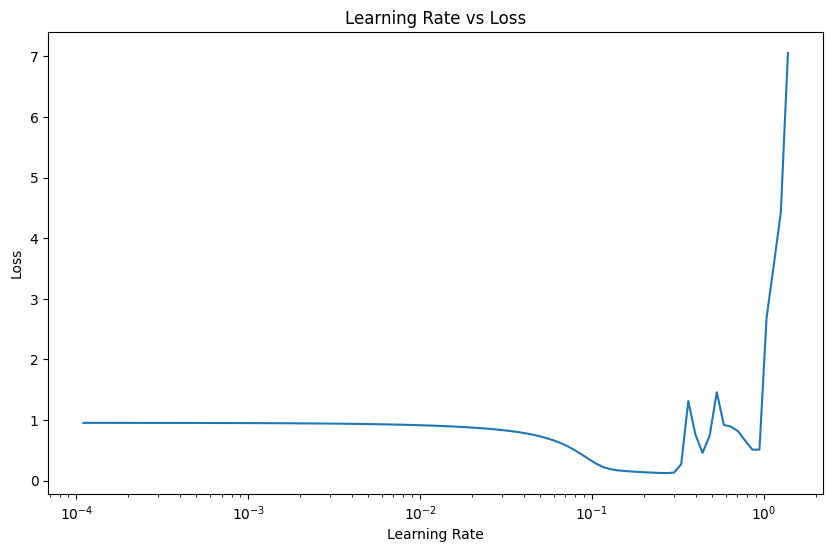

In [198]:
# find the best learning rate
lrs = []
losses = []
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda epoch: 1.1**epoch)

# Training loop to find the best learning rate
for epoch in range(100):
    optimizer.zero_grad()
    predictions = model(X_train)
    loss = active(predictions, y_train)
    loss.backward()
    optimizer.step()
    scheduler.step()

    # Record learning rate and loss
    lrs.append(optimizer.param_groups[0]['lr'])
    losses.append(loss.item())
    print(f"Epoch {epoch}, Loss: {loss.item()}, LR: {optimizer.param_groups[0]['lr']}")

# Plotting Loss vs Learning Rate
plt.figure(figsize=(10, 6))
plt.plot(lrs, losses)
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs Loss')
plt.show()

In [199]:
learning_rt = pd.DataFrame({"LearningRate": lrs, "Loss": losses})
learning_rt

,LearningRate,Loss
0,0.000110,0.954759
1,0.000121,0.954713
2,0.000133,0.954662
3,0.000146,0.954607
4,0.000161,0.954546
...,...,...
95,0.941234,0.514086
96,1.035358,2.687746
97,1.138894,3.547554
98,1.252783,4.424918


In [200]:
learning_rt.sort_values(by = "Loss", ascending = True)

,LearningRate,Loss
82,0.272642,0.125941
81,0.247856,0.129034
80,0.225324,0.133857
83,0.299906,0.134862
79,0.204840,0.139443
...,...,...
89,0.531302,1.460097
96,1.035358,2.687746
97,1.138894,3.547554
98,1.252783,4.424918


In [201]:
# training loop
epochs = 10000
optimizer = optim.SGD(model.parameters(), lr=0.247856)

test_losses = []
loss_values = []
epoch_number = []
for epoch in range (epochs):

  model.train()
  # 1. forward pass
  y_pred = model(X_train)

  # 2. calculate the loss
  loss = active(y_pred, y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. backpropagation
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  # evaluate
  model.eval()
  with torch.inference_mode():
    test_pred = model(X_test)
    test_loss = active(test_pred, y_test)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

  loss_values.append(loss.item())
  test_losses.append(test_loss.item())
  epoch_number.append(epoch)

Epoch: 0 | Loss: 15.558390617370605 | Test Loss: 3.7386434078216553
Epoch: 100 | Loss: 0.1358335316181183 | Test Loss: 0.20966246724128723
Epoch: 200 | Loss: 0.08861088752746582 | Test Loss: 0.23357537388801575
Epoch: 300 | Loss: 0.05676247179508209 | Test Loss: 0.25913164019584656
Epoch: 400 | Loss: 0.04038156569004059 | Test Loss: 0.26271650195121765
Epoch: 500 | Loss: 0.032150380313396454 | Test Loss: 0.2597496807575226
Epoch: 600 | Loss: 0.027990996837615967 | Test Loss: 0.2532910704612732
Epoch: 700 | Loss: 0.02184336446225643 | Test Loss: 0.2520984411239624
Epoch: 800 | Loss: 0.018170636147260666 | Test Loss: 0.2518313527107239
Epoch: 900 | Loss: 0.01342298649251461 | Test Loss: 0.2515193223953247
Epoch: 1000 | Loss: 0.013832813128829002 | Test Loss: 0.250056654214859
Epoch: 1100 | Loss: 0.017634980380535126 | Test Loss: 0.2464359998703003
Epoch: 1200 | Loss: 0.011897668242454529 | Test Loss: 0.2517303228378296
Epoch: 1300 | Loss: 0.008499044924974442 | Test Loss: 0.2590526640415

In [209]:
model_evaluation = pd.DataFrame({"Epoch": epoch_number, "Loss": loss_values, "TestLoss": test_losses})
model_evaluation[model_evaluation["TestLoss"] == model_evaluation["TestLoss"].min()]

,Epoch,Loss,TestLoss
108,108,0.136243,0.208601
